In [1]:
# Importing modules

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
sns.set(style = "darkgrid")

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("/Users/schoolsoftware/Downloads/Airbnb_with_crimes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      20758 non-null  int64  
 1   id                              20758 non-null  int64  
 2   name                            20758 non-null  object 
 3   host_id                         20758 non-null  int64  
 4   host_name                       20758 non-null  object 
 5   neighbourhood_group             20758 non-null  object 
 6   neighbourhood                   20758 non-null  object 
 7   latitude                        20758 non-null  float64
 8   longitude                       20758 non-null  float64
 9   room_type                       20758 non-null  object 
 10  price                           20758 non-null  float64
 11  minimum_nights                  20758 non-null  int64  
 12  number_of_reviews               

In [4]:
df.head(n = 3)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,homicides_1mile
0,0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,...,0.03,1,0,0,No License,5.0,1,1,Not specified,14
1,1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,...,0.24,139,364,2,No License,4.67,2,1,1,5
2,2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,...,1.67,1,343,6,Exempt,4.17,1,2,1,7


In [5]:
for col in df.columns:
    print(col)

Unnamed: 0
id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
license
rating
bedrooms
beds
baths
homicides_1mile


In [18]:
# looking at the number of listings based on area
df.groupby("neighbourhood_group").size()

neighbourhood_group
Bronx             949
Brooklyn         7719
Manhattan        8038
Queens           3761
Staten Island     291
dtype: int64

In [7]:
num_of_listing = df.groupby("neighbourhood_group").size().reset_index(name = "count").sort_values("count", ascending = False)
num_of_listing

,neighbourhood_group,count
2,Manhattan,8038
1,Brooklyn,7719
3,Queens,3761
0,Bronx,949
4,Staten Island,291


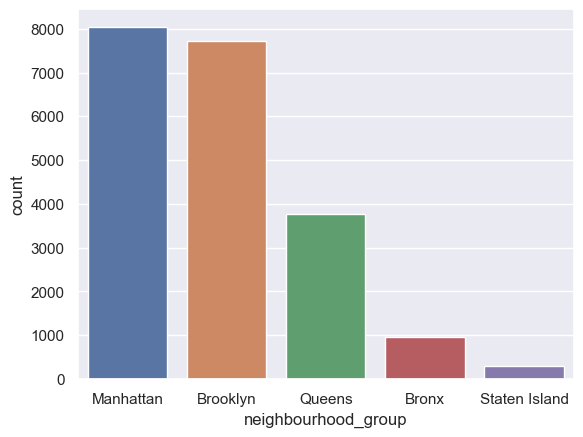

In [27]:
sns.barplot(x = "neighbourhood_group",
            y = "count", data = num_of_listing)
plt.show()

In [41]:
price_by_area = df.groupby("neighbourhood_group")["price"].mean().reset_index(name = "mean_price").sort_values("mean_price", ascending= False)
price_by_area

,neighbourhood_group,mean_price
2,Manhattan,227.854193
1,Brooklyn,187.033942
3,Queens,126.489232
4,Staten Island,118.780069
0,Bronx,118.407798


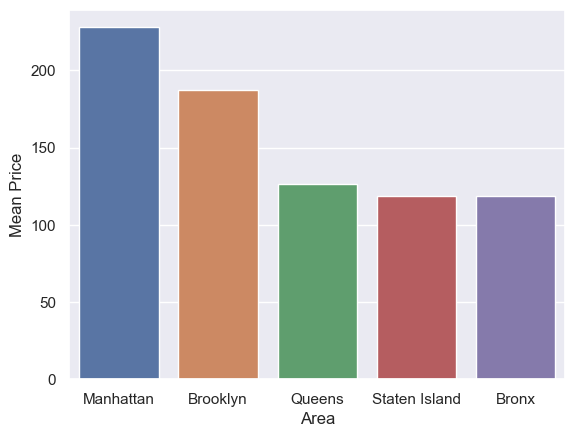

In [47]:
barplot = sns.barplot(x = "neighbourhood_group", y = "mean_price", data = price_by_area)
barplot.set_xlabel("Area")
barplot.set_ylabel("Mean Price")
plt.show()

In [55]:
# df[df["price"] < ]

df_ratings = df[df["price"] < 90000].copy() # removing outliers
df_ratings["rating"] = pd.to_numeric(df_ratings["rating"], errors = "coerce")
df_ratings["rating"].describe()

count    17004.000000
mean         4.734292
std          0.294381
min          1.750000
25%          4.640000
50%          4.810000
75%          4.930000
max          5.000000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Rating per Price')

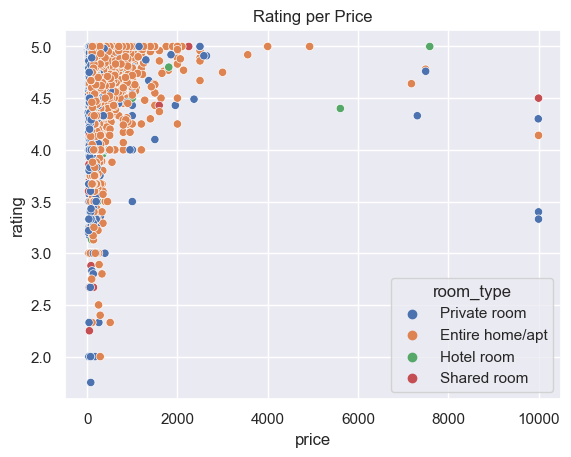

In [58]:
# room type and rating

sns.scatterplot(data = df_ratings, x = "price", y = "rating", hue = "room_type")
plt.title("Rating per Price")

Text(0.5, 1.0, 'Number of Reviews per Price')

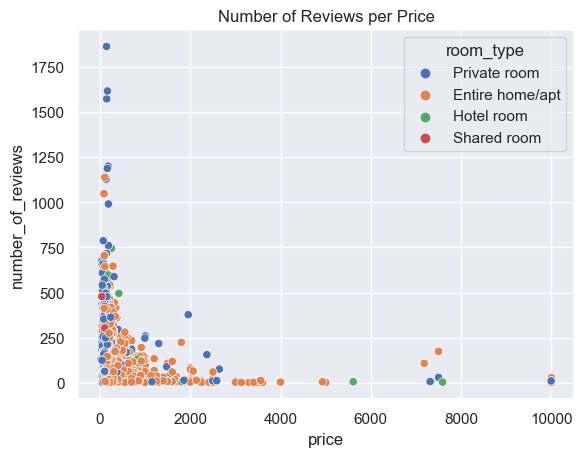

In [59]:
sns.scatterplot(data = df_ratings, x = "price", y = "number_of_reviews", hue = "room_type")
plt.title("Number of Reviews per Price")

<Axes: xlabel='rating', ylabel='number_of_reviews'>

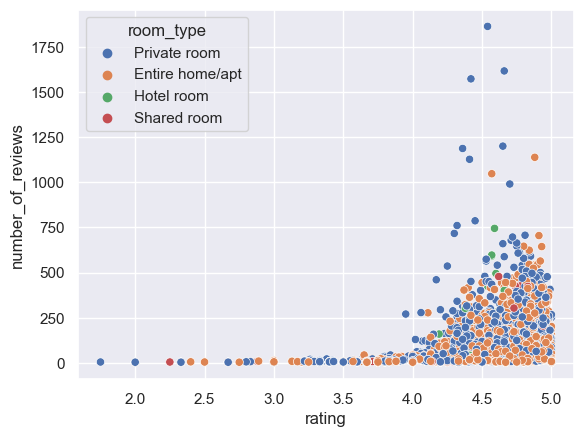

In [60]:
sns.scatterplot(data = df_ratings, x = "rating", y = "number_of_reviews", hue = "room_type")

In [71]:
correlation_matrix = df.drop(["id","host_id","latitude","longitude"],axis = 1).corr(numeric_only = True)
correlation_matrix = correlation_matrix.fillna(0)

<Axes: >

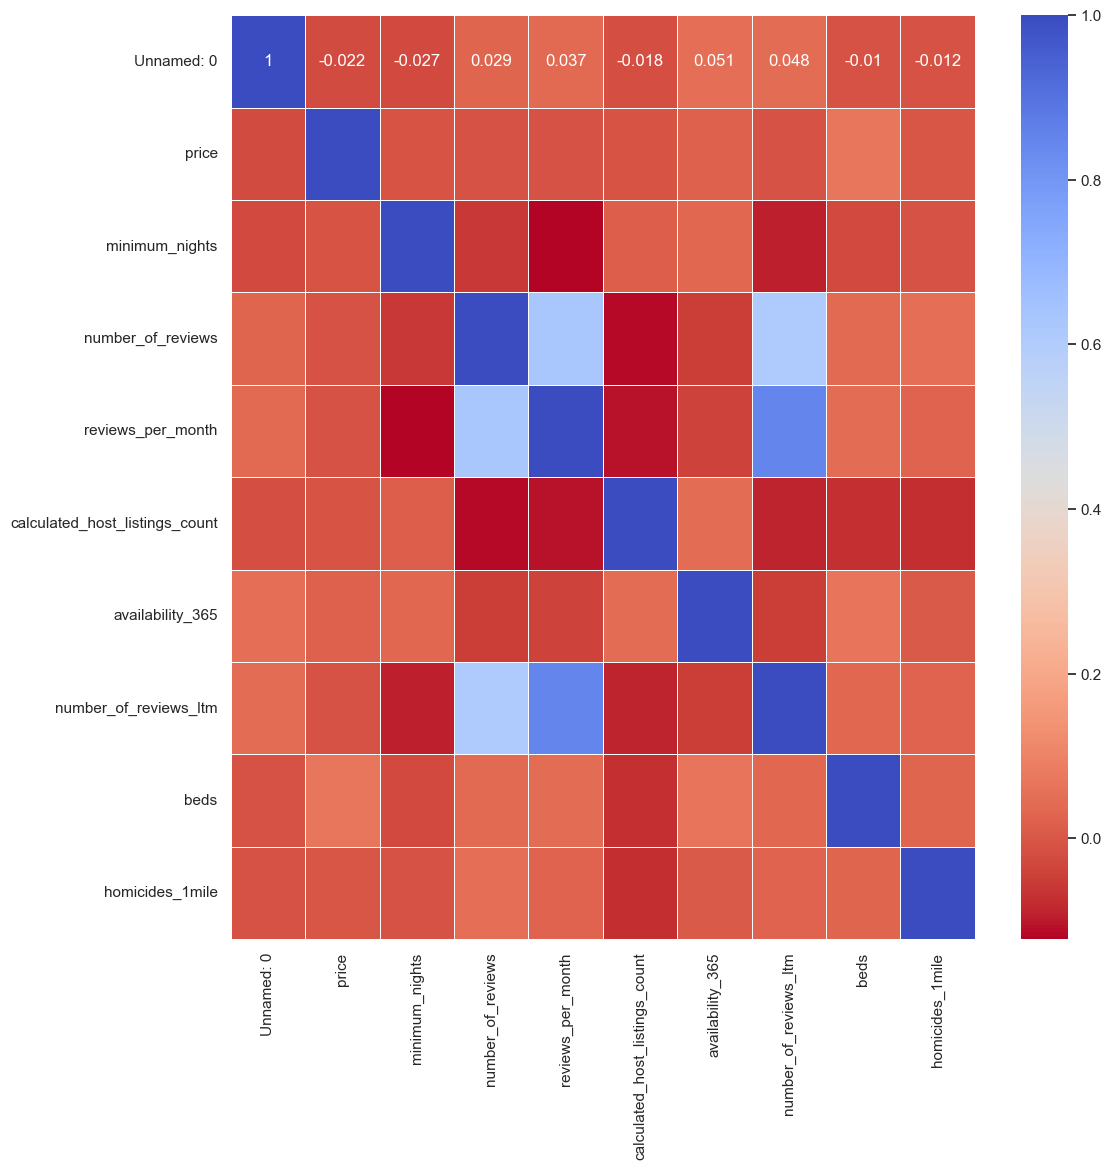

In [74]:
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix, 
            annot = True, 
            cmap = "coolwarm_r", 
            linewidths = 0.5)